# Use Case
The Client

XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

Project delivery:

You have been provided with multiple data sets that contains information on 2 cab companies. Each file (data set) provided represents different aspects of the customer profile. XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

The outcome of your delivery will be a presentation to XYZ’s Executive team. This presentation will be judged based on the visuals provided, the quality of your analysis and the value of your recommendations and insights. 

# Data Set

You have been provided 4 individual data sets. Time period of data is from 31/01/2016 to 31/12/2018.

Below are the list of datasets which are provided for the analysis:

Cab_Data.csv – this file includes details of transaction for 2 cab companies

Customer_ID.csv – this is a mapping table that contains a unique identifier which links the customer’s demographic details

Transaction_ID.csv – this is a mapping table that contains transaction to customer mapping and payment mode

City.csv – this file contains list of US cities, their population and number of cab users

Note: I have downloaded US Holidays dataset to analyse the days off during the year. US Holiday Dates (2004-2021).csv - this file contains list of holidays, with their date, weekday, day, month and year [3]

# Variable Declaration

In [1]:
location_of_file = '/Users/aditidadariya/Aditi Personal/Data Glacier - Internship/Week2/Dataset/'
Cab_Data = "Cab_Data.csv"
City = "City.csv"
Customer_ID = "Customer_ID.csv"
Transaction_ID = "Transaction_ID.csv"
Holidays = "US Holiday Dates (2004-2021).csv"

# Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Function Declaration

In [3]:
# Newline gives a new line
def Newline():
    print("\r\n")

# ReadDataset function reads the dataset excel file and store it in a dataframe
def ReadDataset(location_of_file, filename):
    # Read the data file from specified location
    #df = pd.read_excel(location_of_file + filename, skiprows=1)#, index_col=1)
    df = pd.read_csv(location_of_file + filename) #,header=True)
    return df

# inttodate function converts the int64 into datetime format
def inttodate(dates):
    date_date =  datetime.strptime((datetime(1899,12,29) + timedelta(dates)).strftime("%Y-%m-%d"), "%Y-%m-%d")
    return date_date

# TestHypothesis function is defined to test the hypothesis
def TestHypothesis(a,b):
    _, p_value = stats.ttest_ind(a=a.values,b=b.values,equal_var=True)
    if p_value <= 0.05:
        print('We accept alternate hypothesis')
    else:
        print('We accept null hypothesis')

    print('P value is ', p_value)


# ADFStationarityTest function is defined to test the time series data for its stationarity using dickey-fuller-test [1]
def ADFStationarityTest(df):
    #Dickey-Fuller test:
    adfTest = adfuller(df, autolag='AIC')
    
    dfResults = pd.Series(adfTest[0:4], index = ['ADF Test Statistics', 'p-value', '#Lag Used', 'Number of Observations Used'])
    pValue = adfTest[1]
    for key,value in adfTest[4].items():
        dfResults['Critical Value (%s)' %key] = value
    print('Augmented Dickey-Fuller Test Results:')
    print(dfResults)
        
    if pValue <= 0.05:
        print("The time series data has no unit roots and hence it is stationary")
    else:
        print("The time series data has unit roots and hence it is not stationary")

# SDSeasonalTest function is defined to test the Trend and Seasonality of data [2]
def SDSeasonalTest(data):
    analysis = data.copy()

    decompose_result_mult = seasonal_decompose(analysis, model="additive", period=12)

    trend = decompose_result_mult.trend
    seasonal = decompose_result_mult.seasonal
    residual = decompose_result_mult.resid
    # Plot the results
    fig = decompose_result_mult.plot();
    fig.set_size_inches((16, 9))
    # Tight layout to realign things
    fig.tight_layout()
    plt.show()



# Exploratory Data Analysis

### 1. Read all the dataset

In [4]:
# Reading Cab_Data
df_cab = ReadDataset(location_of_file, Cab_Data)
df_cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
# Reading City Data
df_city = ReadDataset(location_of_file, City)
df_city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
# Reading Customer_ID Data
df_custid = ReadDataset(location_of_file, Customer_ID)
df_custid.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [7]:
# Reading Transaction_ID Data
df_transid = ReadDataset(location_of_file, Transaction_ID)
df_transid.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [8]:
print("The Cab_Data dataset has {} records and {} columns".format(df_cab.shape[0], df_cab.shape[1]))
print("The City dataset has {} records and {} columns".format(df_city.shape[0], df_city.shape[1]))
print("The Customer_ID dataset has {} records and {} columns".format(df_custid.shape[0], df_custid.shape[1]))
print("The Transaction_ID dataset has {} records and {} columns".format(df_transid.shape[0], df_transid.shape[1]))

The Cab_Data dataset has 359392 records and 7 columns
The City dataset has 20 records and 3 columns
The Customer_ID dataset has 49171 records and 4 columns
The Transaction_ID dataset has 440098 records and 3 columns


##### Downloaded the US holiday dataset from kaggle. Extract the holidays between 2016 to 2018 [3]

In [9]:
# Adding Holidays dataset to understand the days off [3]
# Reading Holidays Data
df_holidays = ReadDataset(location_of_file, Holidays)
# Extracting the holidays of 2016 to 2018
df_holidays = df_holidays.loc[(df_holidays['Year']>=2016) & (df_holidays['Year']<=2018 )]
df_holidays.head()

,Date,Holiday,WeekDay,Month,Day,Year
12,2016-07-04,4th of July,Monday,7,4,2016
13,2017-07-04,4th of July,Tuesday,7,4,2017
14,2018-07-04,4th of July,Wednesday,7,4,2018
30,2016-12-25,Christmas Day,Sunday,12,25,2016
31,2017-12-25,Christmas Day,Monday,12,25,2017


In [10]:
print("The Holidays dataset has {} records and {} columns".format(df_holidays.shape[0], df_holidays.shape[1]))

The Holidays dataset has 57 records and 6 columns


### 2. Find the missing values in each dataset

In [11]:
df_cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [12]:
df_city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [13]:
df_custid.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [14]:
df_transid.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [15]:
df_holidays.isnull().sum()

Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64

#### <font color=green> Observation: </font>
   <font color=green> There are no missing values in all the datasets</font>

### 3. Remove spaces and special characters from column names

In [16]:
# Remove spaces and special character from column names
df_cab.columns = df_cab.columns.str.replace(' ', '')
df_custid.columns = df_custid.columns.str.replace(' ', '')
df_transid.columns = df_transid.columns.str.replace(' ', '')
df_transid.columns = df_transid.columns.str.replace('_', '')

### 4. Verify the datatypes and convert it to correct datatype

In [17]:
# Verifying Cab_Data dataset
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  359392 non-null  int64  
 1   DateofTravel   359392 non-null  int64  
 2   Company        359392 non-null  object 
 3   City           359392 non-null  object 
 4   KMTravelled    359392 non-null  float64
 5   PriceCharged   359392 non-null  float64
 6   CostofTrip     359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


#### <font color=green> Observation: </font>
<font color=green> Date of Travel variable is in int64 datatype. Converting it into datetime in next step</font>

In [18]:
# Converting datatype of DateofTravel from int64 to datetime
df_cab['DateofTravel'] = df_cab['DateofTravel'].apply(lambda x: inttodate(x))

In [19]:
df_cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionID  359392 non-null  int64         
 1   DateofTravel   359392 non-null  datetime64[ns]
 2   Company        359392 non-null  object        
 3   City           359392 non-null  object        
 4   KMTravelled    359392 non-null  float64       
 5   PriceCharged   359392 non-null  float64       
 6   CostofTrip     359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [20]:
# Verifying City dataset
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


#### <font color=green> Observation: </font>
<font color=green> Population and Users variables are in object datatype. Converting it into int64 in next step </font>


In [21]:
# Replacing the commas in the Population and Users variables and then Converting them to int64
df_city['Population'] = pd.Series(df_city['Population']).str.replace(',', '').astype(int)
df_city['Users'] = pd.Series(df_city['Users']).str.replace(',', '').astype(int)

In [22]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [23]:
# Verifying Customer_ID dataset
df_custid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         49171 non-null  int64 
 1   Gender             49171 non-null  object
 2   Age                49171 non-null  int64 
 3   Income(USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


#### <font color=green> Observation: </font>
<font color=green> Datatypes on Customer_ID dataset looks fine </font>


In [24]:
# Verifying Transaction_ID dataset
df_transid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   TransactionID  440098 non-null  int64 
 1   CustomerID     440098 non-null  int64 
 2   PaymentMode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#### <font color=green> Observation: </font>
<font color=green> Datatypes on Transaction_ID dataset looks fine </font>


### 5. Find the duplicate values in each dataset

In [25]:
df_cab.duplicated().sum()

0

In [26]:
df_city.duplicated().sum()

0

In [27]:
df_custid.duplicated().sum()

0

In [28]:
df_transid.duplicated().sum()

0

#### <font color=green> Observation: </font>
<font color=green> There is no duplicate data in any dataset </font>


### 6. Extracting the Year and Month from Date Of Travel variable in Cab_Data dataset

In [29]:
df_cab['Year'] = df_cab['DateofTravel'].dt.year
df_cab['Month'] = df_cab['DateofTravel'].dt.month
df_cab.head(2)

,TransactionID,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip,Year,Month
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854,2016,1


### 7. Master Data Tabular View


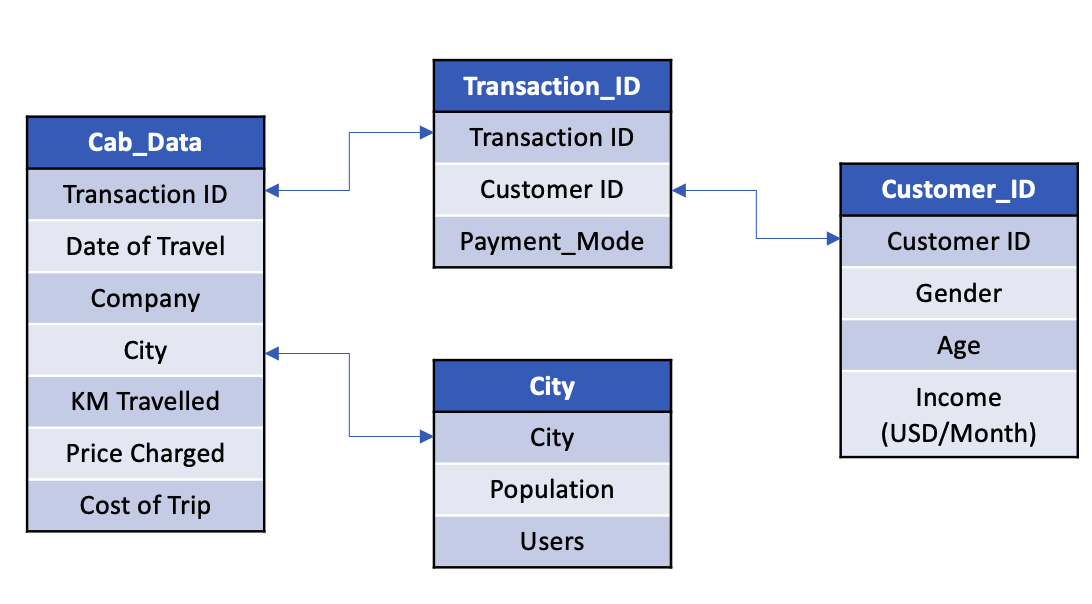

#### <font color=green> Observation: </font>
<font color=green> 1. Transaction ID variable is the common key on Cab_Data and Transaction_ID datasets. Hence, Cab_Data and Transaction_ID datasets can be combined by using Transaction ID variable. </font>

<font color=green> 2. Customer ID variable is the common key on Transaction_ID and Customer_ID datasets. Hence, Transaction_ID and Customer_ID datasets can be combined by using Customer ID variable. </font>

<font color=green> 3. City variable is the common key on Cab_Data and City datasets. Hence, Cab_Data and City datasets can be combined using City variable. </font>


### 8. Master Data Creation as per the Tabular View above

In [30]:
# Setting TransactionID variable as index on Cab_Data dataset
df_cab = df_cab.set_index('TransactionID')
df_cab.head(1)

,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip,Year,Month
TransactionID,,,,,,,,
10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1


In [31]:
# Setting TransactionID variable as index on Transaction_ID dataset
df_transid = df_transid.set_index('TransactionID')
df_transid.head(1)

,CustomerID,PaymentMode
TransactionID,,
10000011,29290,Card


In [32]:
# Combine Cab_Data and Transaction_ID dataset by TransactionID variable
df_cab_transid = df_cab.join(df_transid)
df_cab_transid.head(1)

,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip,Year,Month,CustomerID,PaymentMode
TransactionID,,,,,,,,,,
10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,29290,Card


In [33]:
# Resetting index of df_cab_transid
df_cab_transid.reset_index(inplace = True)

In [34]:
# Setting 'TransactionID','CustomerID' variables as index for further computation
df_cab_transid.set_index(['TransactionID','CustomerID'], inplace = True)
df_cab_transid.head(1)

,,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip,Year,Month,PaymentMode
TransactionID,CustomerID,,,,,,,,,
10000011,29290,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,Card


In [35]:
# Setting CustomerID as index for df_custid
df_custid.set_index('CustomerID', inplace = True)
df_custid.head(1)

,Gender,Age,Income(USD/Month)
CustomerID,,,
29290,Male,28,10813


In [36]:
# Combining Cab_Data_TransactionID and Customer_ID Data
df_cab_transid_custid = df_cab_transid.join(df_custid)
df_cab_transid_custid.head(1)

,,DateofTravel,Company,City,KMTravelled,PriceCharged,CostofTrip,Year,Month,PaymentMode,Gender,Age,Income(USD/Month)
TransactionID,CustomerID,,,,,,,,,,,,
10000011,29290,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635,2016,1,Card,Male,28,10813


In [37]:
# Resetting the index of df_cab_transid_custid
df_cab_transid_custid.reset_index(inplace = True)

In [38]:
# Setting the index of df_cab_transid_custid with TransactionID, CustomerID, City
df_cab_transid_custid.set_index(['TransactionID','CustomerID', 'City'], inplace = True)
df_cab_transid_custid.head(1)

,,,DateofTravel,Company,KMTravelled,PriceCharged,CostofTrip,Year,Month,PaymentMode,Gender,Age,Income(USD/Month)
TransactionID,CustomerID,City,,,,,,,,,,,
10000011,29290,ATLANTA GA,2016-01-07,Pink Cab,30.45,370.95,313.635,2016,1,Card,Male,28,10813


In [39]:
# Setting the index of City Data 
df_city.set_index('City', inplace = True)
df_city.head(1)

,Population,Users
City,,
NEW YORK NY,8405837,302149


In [40]:
# Combining Cab_Data_TransactionID_Customer_ID and City Data
df_master = df_cab_transid_custid.join(df_city)
# Final Master Data is with df_cab_transid_custid_city
df_master.head()

,,,DateofTravel,Company,KMTravelled,PriceCharged,CostofTrip,Year,Month,PaymentMode,Gender,Age,Income(USD/Month),Population,Users
TransactionID,CustomerID,City,,,,,,,,,,,,,
10000011,29290,ATLANTA GA,2016-01-07,Pink Cab,30.45,370.95,313.635,2016,1,Card,Male,28,10813,814885,24701
10000012,27703,ATLANTA GA,2016-01-05,Pink Cab,28.62,358.52,334.854,2016,1,Card,Male,27,9237,814885,24701
10000013,28712,ATLANTA GA,2016-01-01,Pink Cab,9.04,125.20,97.632,2016,1,Cash,Male,53,11242,814885,24701
10000014,28020,ATLANTA GA,2016-01-06,Pink Cab,33.17,377.40,351.602,2016,1,Cash,Male,23,23327,814885,24701
10000015,27182,ATLANTA GA,2016-01-02,Pink Cab,8.73,114.62,97.776,2016,1,Card,Male,33,8536,814885,24701


In [41]:
# Creating a new variable to hold the Profit
df_master['Profit'] = df_master['PriceCharged'] - df_master['CostofTrip']
df_master.head(2)

,,,DateofTravel,Company,KMTravelled,PriceCharged,CostofTrip,Year,Month,PaymentMode,Gender,Age,Income(USD/Month),Population,Users,Profit
TransactionID,CustomerID,City,,,,,,,,,,,,,,
10000011,29290,ATLANTA GA,2016-01-07,Pink Cab,30.45,370.95,313.635,2016,1,Card,Male,28,10813,814885,24701,57.315
10000012,27703,ATLANTA GA,2016-01-05,Pink Cab,28.62,358.52,334.854,2016,1,Card,Male,27,9237,814885,24701,23.666


In [42]:
# Find any missing values in the Master Data
df_master.isnull().sum()

DateofTravel         0
Company              0
KMTravelled          0
PriceCharged         0
CostofTrip           0
Year                 0
Month                0
PaymentMode          0
Gender               0
Age                  0
Income(USD/Month)    0
Population           0
Users                0
Profit               0
dtype: int64

In [43]:
# Resetting the index of df_master
df_master.reset_index(inplace = True)

In [44]:
# Saving master data to local
df_master.to_csv("G2M_Master.csv")

### 9. Find the outliers in master dataset

In [45]:
df_master.describe()

,TransactionID,CustomerID,KMTravelled,PriceCharged,CostofTrip,Year,Month,Age,Income(USD/Month),Population,Users,Profit
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,22.567254,423.443311,286.190113,2017.041693,7.509243,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198
std,1.268058e+05,21012.412463,12.233526,274.378911,157.993661,0.801378,3.428929,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840
min,1.000001e+07,1.000000,1.900000,15.600000,19.000000,2016.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000
25%,1.011081e+07,2705.000000,12.000000,206.437500,151.200000,2016.000000,5.000000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000
50%,1.022104e+07,7459.000000,22.440000,386.360000,282.480000,2017.000000,8.000000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000
75%,1.033094e+07,36078.000000,32.960000,583.660000,413.683200,2018.000000,11.000000,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000
max,1.044011e+07,60000.000000,48.000000,2048.030000,691.200000,2018.000000,12.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000


<AxesSubplot:xlabel='KMTravelled', ylabel='CostofTrip'>

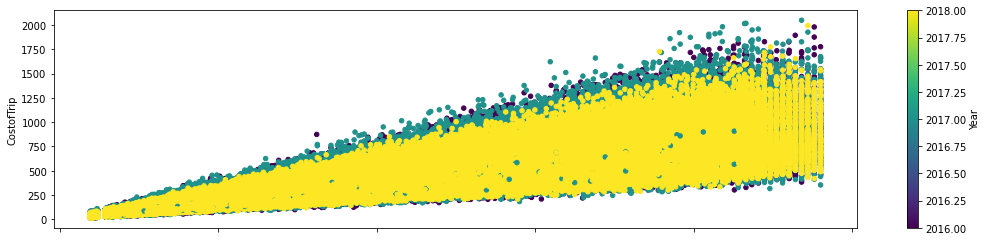

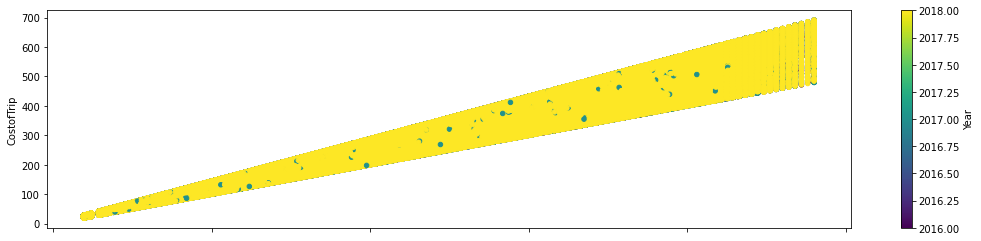

In [46]:
# create a figure with two subplots having PriceCharged and CostofTrip
df_master.plot.scatter(x='KMTravelled', y='PriceCharged', c='Year', colormap='viridis', figsize=(18, 4), xlabel='KMTravelled', ylabel='CostofTrip')
df_master.plot.scatter(x='KMTravelled', y='CostofTrip', c='Year', colormap='viridis', figsize=(18, 4), xlabel='KMTravelled', ylabel='CostofTrip')


#### <font color=green> Observation: </font>
<font color=green> There seems to be some outliers in Price Charged variable. Will keep these outliers as the distance travelled varies and it might be important to get the Profit Margin. </font>


# Data Visualization

### 1. Correlation between data variables


In [47]:
# Creating a correlation for master dataset [4]
corr = df_master.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,TransactionID,CustomerID,KMTravelled,PriceCharged,CostofTrip,Year,Month,Age,Income(USD/Month),Population,Users,Profit
TransactionID,1.000000,-0.016912,-0.001429,-0.052902,-0.003462,0.941475,0.284724,-0.001267,-0.001570,0.023868,0.013526,-0.087130
CustomerID,-0.016912,1.000000,0.000389,-0.177324,0.003077,-0.002480,-0.045030,-0.004735,-0.013608,-0.647052,-0.610742,-0.306527
KMTravelled,-0.001429,0.000389,1.000000,0.835753,0.981848,-0.001094,-0.001773,-0.000369,-0.000544,-0.002311,-0.000428,0.462768
PriceCharged,-0.052902,-0.177324,0.835753,1.000000,0.859812,-0.036903,-0.059639,-0.003084,0.003228,0.326589,0.281061,0.864154
CostofTrip,-0.003462,0.003077,0.981848,0.859812,1.000000,-0.001766,-0.008309,-0.000189,-0.000633,0.015108,0.023628,0.486056
Year,0.941475,-0.002480,-0.001094,-0.036903,-0.001766,1.000000,-0.033169,-0.000497,-0.001679,0.000061,-0.000556,-0.061420
Month,0.284724,-0.045030,-0.001773,-0.059639,-0.008309,-0.033169,1.000000,-0.002376,0.000585,0.064827,0.036285,-0.093886
Age,-0.001267,-0.004735,-0.000369,-0.003084,-0.000189,-0.000497,-0.002376,1.000000,0.003907,-0.009002,-0.005906,-0.005093
Income(USD/Month),-0.001570,-0.013608,-0.000544,0.003228,-0.000633,-0.001679,0.000585,0.003907,1.000000,0.011868,0.010464,0.006148
Population,0.023868,-0.647052,-0.002311,0.326589,0.015108,0.000061,0.064827,-0.009002,0.011868,1.000000,0.915490,0.544079


#### <font color=green> Observation: </font>
<font color=green> 1. There seems to be a correlation between KMTravelled with Price Charged/Cost of Trip. Also Price Charged and Cost of Trip are correlated. </font>

<font color=green> 2. There seems to be a correlation between Price Charged with Population and Users. </font>

### 2. Analysing the percentage of Pink and Yellow Cab


In [48]:
# Grouped the Master data by Company
df_master_year = df_master.groupby(by=['Company'], as_index=False)['TransactionID'].count()


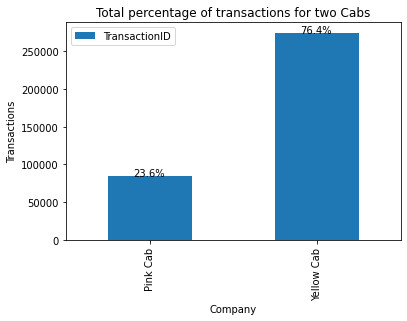

In [49]:
# create a bar plot
ax = df_master_year.plot(kind='bar', title='Total percentage of transactions for two Cabs')
ax.set_xticklabels(df_master_year['Company'])
# add text labels with percentages to the bars
for i, v in enumerate(df_master_year['TransactionID']):
    ax.text(i - 0.1, v + 1, f'{v/df_master_year["TransactionID"].sum()*100:.1f}%', color='black', fontsize=10)

# add labels to the x and y axes of both subplots
ax.set_xlabel('Company')
ax.set_ylabel('Transactions')
plt.show()



#### <font color=green> Observation: </font>
<font color=green> There seems to be a huge difference in the total number of transactions between Pink and Yellow cabs. Pink Cab is just 23.6% and Yellow has been 76.4%. </font>

##### Dividing the master data into Pink cab data and Yellow cab to analyse then seperately and compare them accordingly

In [50]:
# Getting 2 dataframes for each Cab Company for visualization and comparison
df_pinkcab = df_master.loc[df_master['Company'] == 'Pink Cab']
df_yellowcab = df_master.loc[df_master['Company'] == 'Yellow Cab']

In [51]:
df_pinkcab.head(1)

,TransactionID,CustomerID,City,DateofTravel,Company,KMTravelled,PriceCharged,CostofTrip,Year,Month,PaymentMode,Gender,Age,Income(USD/Month),Population,Users,Profit
0,10000011,29290,ATLANTA GA,2016-01-07,Pink Cab,30.45,370.95,313.635,2016,1,Card,Male,28,10813,814885,24701,57.315


In [52]:
df_yellowcab.head(1)

,TransactionID,CustomerID,City,DateofTravel,Company,KMTravelled,PriceCharged,CostofTrip,Year,Month,PaymentMode,Gender,Age,Income(USD/Month),Population,Users,Profit
233,10000384,27602,ATLANTA GA,2016-01-01,Yellow Cab,33.93,1341.17,464.1624,2016,1,Card,Male,23,8542,814885,24701,877.0076


### 3. Yearly Analysis of Pink and Yellow cabs by KMTravelled and Prices

In [53]:
# Grouped the Pink Cab data by Year
df_pinkcab_year = df_pinkcab.groupby(by=['Year'], as_index=False)['KMTravelled','PriceCharged','CostofTrip', 'Profit'].sum()
# Grouped the Yellow Cab data by Year
df_yellowcab_year = df_yellowcab.groupby(by=['Year'], as_index=False)['KMTravelled','PriceCharged','CostofTrip', 'Profit'].sum()


/var/folders/8g/nsnkxm0d64lfdw2mmm0d35pw0000gn/T/ipykernel_21612/288071617.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_pinkcab_year = df_pinkcab.groupby(by=['Year'], as_index=False)['KMTravelled','PriceCharged','CostofTrip', 'Profit'].sum()
/var/folders/8g/nsnkxm0d64lfdw2mmm0d35pw0000gn/T/ipykernel_21612/288071617.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_yellowcab_year = df_yellowcab.groupby(by=['Year'], as_index=False)['KMTravelled','PriceCharged','CostofTrip', 'Profit'].sum()


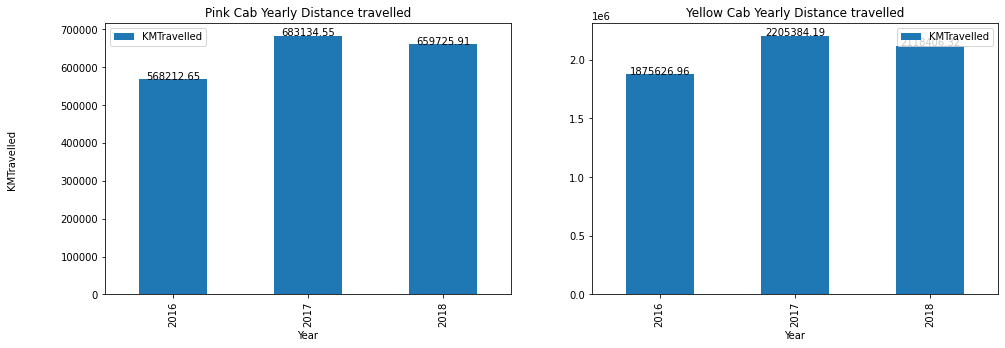

In [54]:
df1_pcy = pd.DataFrame(df_pinkcab_year).set_index('Year')
df2_ycy = pd.DataFrame(df_yellowcab_year).set_index('Year')

df1 = pd.DataFrame(df1_pcy['KMTravelled'])
df2 = pd.DataFrame(df2_ycy['KMTravelled'])

# create a 1x2 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

# loop over the dataframes and create a bar plot in each subplot
for i, df in enumerate([df1, df2]):
    ax = axs[i]
    if i == 0:
        ax.set_title(f'Pink Cab Yearly Distance travelled')
    elif i == 1:
        ax.set_title(f'Yellow Cab Yearly Distance travelled')
        
    df.plot(kind='bar', ax=ax)

    # add text labels with percentages to the bars
    for j, col in enumerate(df.columns):
        for k, v in enumerate(df[col]):
            ax.text(k, v + 1, f'{v:.2f}', color='black', fontsize=10, ha='center')

# add a shared y-axis label and display the plot
fig.text(0.04, 0.5, 'KMTravelled', va='center', rotation='vertical')
plt.show()


#### <font color=green> Observation: </font>
<font color=green> Distance travelled by Yellow cab per year is more than Pink cab, however the percent of travel in each year by each cab is not much different. Year 2017 has the highest percentage of travel compared to 2016 and 2018 for both the cabs. </font>


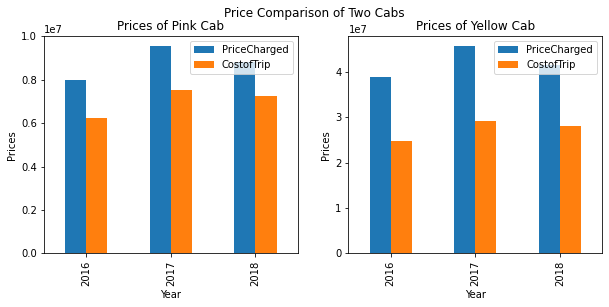

In [55]:
### Determining the Yearly Price charged and Cost of Trip by each cab company

# select the columns to plot
df1_values = df_pinkcab_year[['PriceCharged', 'CostofTrip']]
df2_values = df_yellowcab_year[['PriceCharged', 'CostofTrip']]

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# plot the first bar chart on the first subplot
df1_values.plot.bar(ax=ax1)
ax1.set_xticklabels(df_pinkcab_year['Year'])
ax1.set_title('Prices of Pink Cab')

# plot the second bar chart on the second subplot
df2_values.plot.bar(ax=ax2)
ax2.set_xticklabels(df_yellowcab_year['Year'])
ax2.set_title('Prices of Yellow Cab')

# add labels to the x and y axes of both subplots
ax1.set_xlabel('Year')
ax1.set_ylabel('Prices')
ax2.set_xlabel('Year')
ax2.set_ylabel('Prices')

# set the overall title of the figure
fig.suptitle('Price Comparison of Two Cabs')

# show the plot
plt.show()


#### <font color=green> Observation: </font> 
<font color=green> Profit margin by Yellow cab is more than Pink cab, as the difference between Price charged and Cost of Trip depicted in the graph above is more for Yellow cab than Pink cab in each year </font>


### 4. Monthly Analysis of Pink and Yellow cabs by KMTravelled and Prices

In [56]:
# Grouped the Pink Cab data by Month
df_pinkcab_month = df_pinkcab.groupby(by=['Month'], as_index=False)['KMTravelled','PriceCharged','CostofTrip', 'Profit'].sum()
# Grouped the Yellow Cab data by Month
df_yellowcab_month = df_yellowcab.groupby(by=['Month'], as_index=False)['KMTravelled','PriceCharged','CostofTrip', 'Profit'].sum()


/var/folders/8g/nsnkxm0d64lfdw2mmm0d35pw0000gn/T/ipykernel_21612/101476777.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_pinkcab_month = df_pinkcab.groupby(by=['Month'], as_index=False)['KMTravelled','PriceCharged','CostofTrip', 'Profit'].sum()
/var/folders/8g/nsnkxm0d64lfdw2mmm0d35pw0000gn/T/ipykernel_21612/101476777.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_yellowcab_month = df_yellowcab.groupby(by=['Month'], as_index=False)['KMTravelled','PriceCharged','CostofTrip', 'Profit'].sum()


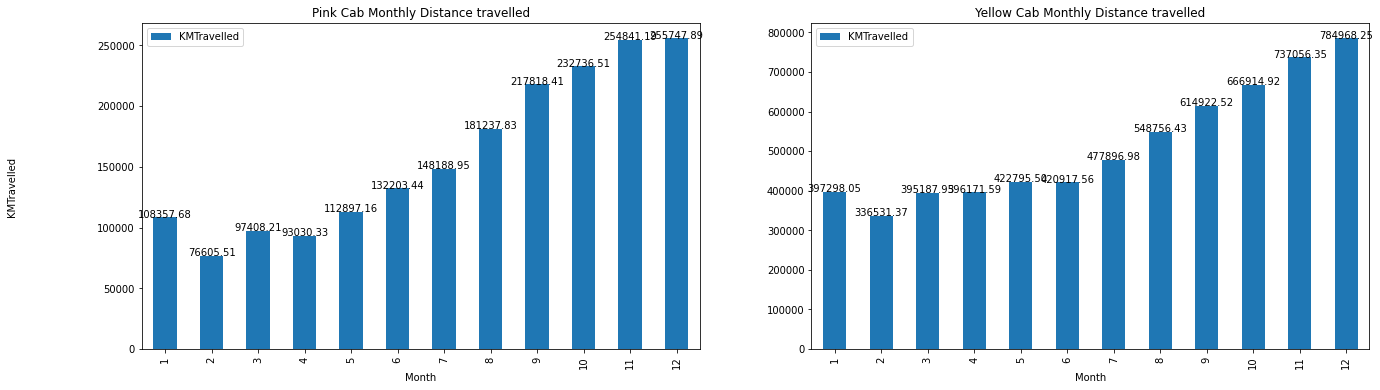

In [57]:
df1_pcy = pd.DataFrame(df_pinkcab_month).set_index('Month')
df2_ycy = pd.DataFrame(df_yellowcab_month).set_index('Month')

df1 = pd.DataFrame(df1_pcy['KMTravelled'])
df2 = pd.DataFrame(df2_ycy['KMTravelled'])

# create a 1x2 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(22,6))

# loop over the dataframes and create a bar plot in each subplot
for i, df in enumerate([df1, df2]):
    ax = axs[i]
    if i == 0:
        ax.set_title(f'Pink Cab Monthly Distance travelled')
    elif i == 1:
        ax.set_title(f'Yellow Cab Monthly Distance travelled')
        
    df.plot(kind='bar', ax=ax)

    # add text labels with percentages to the bars
    for j, col in enumerate(df.columns):
        for k, v in enumerate(df[col]):
            ax.text(k, v + 1, f'{v:.2f}', color='black', fontsize=10, ha='center')

# add a shared y-axis label and display the plot
fig.text(0.04, 0.5, 'KMTravelled', va='center', rotation='vertical')
plt.show()

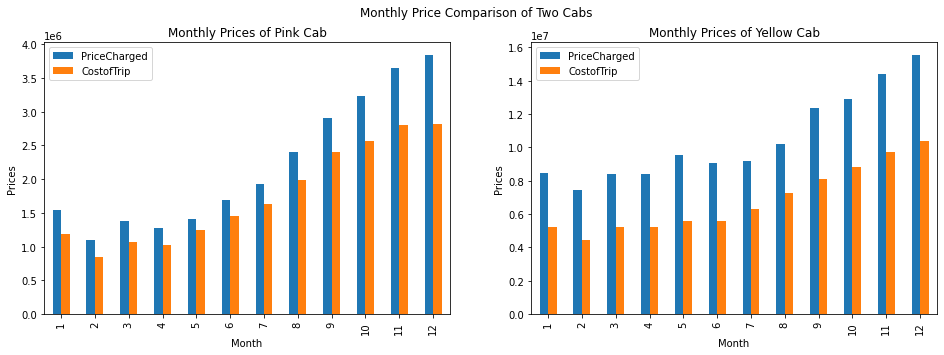

In [58]:
### Determining the monthly Price charged and Cost of Trip by each cab company

# select the columns to plot
df1_values = df_pinkcab_month[['PriceCharged', 'CostofTrip']]
df2_values = df_yellowcab_month[['PriceCharged', 'CostofTrip']]

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# plot the first bar chart on the first subplot
df1_values.plot.bar(ax=ax1)
ax1.set_xticklabels(df_pinkcab_month['Month'])
ax1.set_title('Monthly Prices of Pink Cab')

# plot the second bar chart on the second subplot
df2_values.plot.bar(ax=ax2)
ax2.set_xticklabels(df_yellowcab_month['Month'])
ax2.set_title('Monthly Prices of Yellow Cab')

# add labels to the x and y axes of both subplots
ax1.set_xlabel('Month')
ax1.set_ylabel('Prices')
ax2.set_xlabel('Month')
ax2.set_ylabel('Prices')

# set the overall title of the figure
fig.suptitle('Monthly Price Comparison of Two Cabs')

# show the plot
plt.show()


#### <font color=green> Observation: </font> 
<font color=green> From above 4 graphs, its clear that the distance and profit margin of Yellow cab is more than Pink cab and is maximum in the month of Dec </font>


### 5. Monthly Analysis of Pink and Yellow cabs by TransactionID

In [59]:
# Grouped the Pink Cab data by Month
df_pinkcab_month_tranid = df_pinkcab.groupby(by=['Month'], as_index=False)['TransactionID'].count()
# Grouped the Yellow Cab data by Month
df_yellowcab_month_tranid = df_yellowcab.groupby(by=['Month'], as_index=False)['TransactionID'].count()


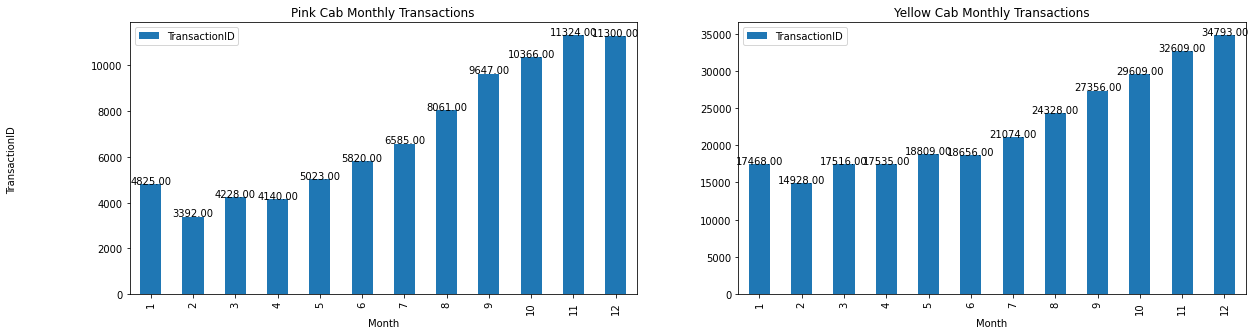

In [60]:
df1_pcy = pd.DataFrame(df_pinkcab_month_tranid).set_index('Month')
df2_ycy = pd.DataFrame(df_yellowcab_month_tranid).set_index('Month')

df1 = pd.DataFrame(df1_pcy['TransactionID'])
df2 = pd.DataFrame(df2_ycy['TransactionID'])

# create a 1x2 subplot grid
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

# loop over the dataframes and create a bar plot in each subplot
for i, df in enumerate([df1, df2]):
    ax = axs[i]
    if i == 0:
        ax.set_title(f'Pink Cab Monthly Transactions')
    elif i == 1:
        ax.set_title(f'Yellow Cab Monthly Transactions')
        
    df.plot(kind='bar', ax=ax)

    # add text labels with percentages to the bars
    for j, col in enumerate(df.columns):
        for k, v in enumerate(df[col]):
            ax.text(k, v + 1, f'{v:.2f}', color='black', fontsize=10, ha='center')

# add a shared y-axis label and display the plot
fig.text(0.04, 0.5, 'TransactionID', va='center', rotation='vertical')
plt.show()

#### <font color=green> Observation: </font>
<font color=green> 1. It's clear that the number of transactions in Dec months is more for both cabs compared to other months. </font>

<font color=green> 2. The number of transaction by Yellow cab in the month of Dec is between 30000 and 35000 where as by Pink cab its between 10000 and 12000. </font>


### 6. Analysis of Holidays dataset

<AxesSubplot:title={'center':'Holidays per Month'}, xlabel='Month', ylabel='Holidays'>

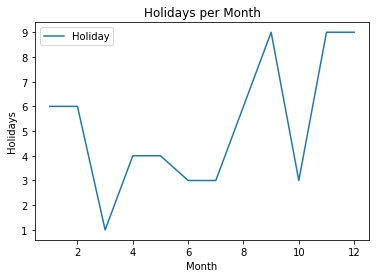

In [61]:
# Ploting the holidays of each month
df_holidays_count = df_holidays.groupby(by=['Month'], as_index=False)['Holiday'].count()
df_holidays_count.plot(x='Month', y='Holiday', rot=0, title='Holidays per Month'
                    , xlabel= 'Month', ylabel= 'Holidays')

#### <font color=green> Observation: </font> 
<font color=green> Number of holidays in the month of Sep, Nov and Dec are higher than rest of the months. This depicts that due to holidays in the month of Dec, the travel transactions are higher, which also leads to be the most profitable months </font>

### 7. Analysis of Pink and Yellow cabs by Gender


In [62]:
# Grouped the Pink Cab data by Gender
df_pinkcab_gender_tranid = df_pinkcab.groupby(by=['Gender'], as_index=False)['TransactionID'].count()
# Grouped the Yellow Cab data by Gender
df_yellowcab_gender_tranid = df_yellowcab.groupby(by=['Gender'], as_index=False)['TransactionID'].count()


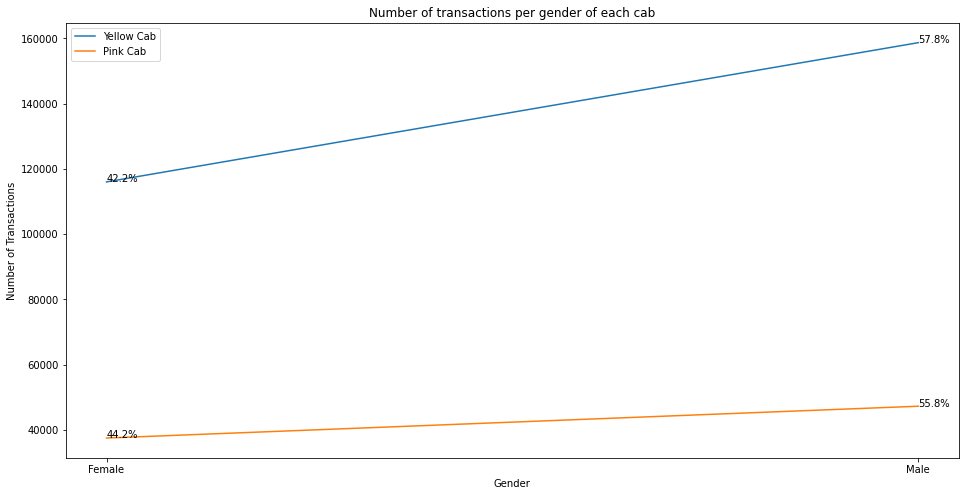

In [63]:
### Determining the number of transactions by Gender for each cab company

# create the subplot object
fig, ax = plt.subplots(figsize=(16, 8))

# plot the data frames
ax.plot(df_yellowcab_gender_tranid['Gender'], df_yellowcab_gender_tranid['TransactionID'], label='Yellow Cab')
# add text labels with percentages to the bars
for i, v in enumerate(df_yellowcab_gender_tranid['TransactionID']):
    ax.text(i , v + 1, f'{v/df_yellowcab_gender_tranid["TransactionID"].sum()*100:.1f}%', color='black', fontsize=10)

    
ax.plot(df_pinkcab_gender_tranid['Gender'], df_pinkcab_gender_tranid['TransactionID'], label='Pink Cab')
# add text labels with percentages to the bars
for i, v in enumerate(df_pinkcab_gender_tranid['TransactionID']):
    ax.text(i , v + 1, f'{v/df_pinkcab_gender_tranid["TransactionID"].sum()*100:.1f}%', color='black', fontsize=10)

    
# set the axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Number of Transactions')
ax.set_title('Number of transactions per gender of each cab')

# add legend
ax.legend()

# show the plot
plt.show()

#### <font color=green> Observation: </font> 
<font color=green> In Yellow cab, the numbers of transactions by Male customers are nearly 15% more than Female customers. Whereas in Pink Cab, the number of Male are 10% more than the Female users. </font>


In [64]:
# Grouped the Pink Cab data by Gender
df_pinkcab_gender_price = df_pinkcab.groupby(by=['Gender'], as_index=False)['PriceCharged', 'Profit'].sum()
# Grouped the Yellow Cab data by Gender
df_yellowcab_gender_price = df_yellowcab.groupby(by=['Gender'], as_index=False)['PriceCharged', 'Profit'].sum()


/var/folders/8g/nsnkxm0d64lfdw2mmm0d35pw0000gn/T/ipykernel_21612/2496481332.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_pinkcab_gender_price = df_pinkcab.groupby(by=['Gender'], as_index=False)['PriceCharged', 'Profit'].sum()
/var/folders/8g/nsnkxm0d64lfdw2mmm0d35pw0000gn/T/ipykernel_21612/2496481332.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_yellowcab_gender_price = df_yellowcab.groupby(by=['Gender'], as_index=False)['PriceCharged', 'Profit'].sum()


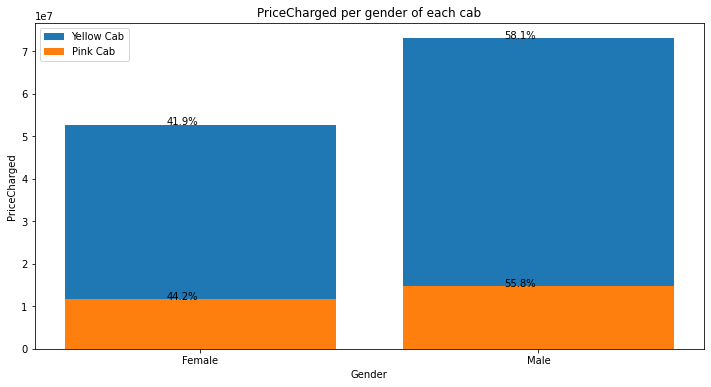

In [65]:
### Determining the Price Charged by Gender for each cab company

# create the plot object
fig, ax = plt.subplots(figsize=(12, 6))

# plot the data frames
ax.bar(df_yellowcab_gender_price['Gender'], df_yellowcab_gender_price['PriceCharged'], label='Yellow Cab')
# add text labels with percentages to the bars
for i, v in enumerate(df_yellowcab_gender_price['PriceCharged']):
    ax.text(i - 0.1, v + 1, f'{v/df_yellowcab_gender_price["PriceCharged"].sum()*100:.1f}%', color='black', fontsize=10)


ax.bar(df_pinkcab_gender_price['Gender'], df_pinkcab_gender_price['PriceCharged'], label='Pink Cab')
# add text labels with percentages to the bars
for i, v in enumerate(df_pinkcab_gender_price['PriceCharged']):
    ax.text(i - 0.1, v + 1, f'{v/df_pinkcab_gender_price["PriceCharged"].sum()*100:.1f}%', color='black', fontsize=10)

    
# set the axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('PriceCharged')
ax.set_title('PriceCharged per gender of each cab')

# add legend
ax.legend()

# show the plot
plt.show()

#### <font color=green> Observation: </font>
<font color=green> 1. Pink cab charged nearly same price for Male and Female users.</font>

<font color=green> 2. Yellow cab charged higher Price for Male users than Female users. </font>


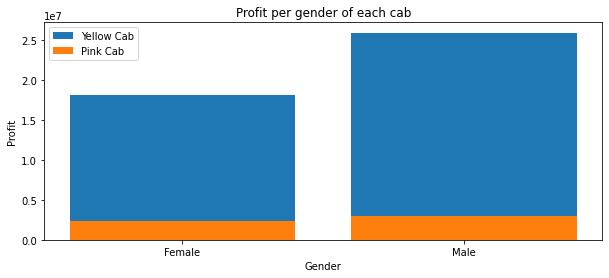

In [66]:
### Determining the Profit by Gender for each cab company

# create the plot object
fig, ax = plt.subplots(figsize=(10, 4))

# plot the data frames
ax.bar(df_yellowcab_gender_price['Gender'], df_yellowcab_gender_price['Profit'], label='Yellow Cab')
ax.bar(df_pinkcab_gender_price['Gender'], df_pinkcab_gender_price['Profit'], label='Pink Cab')

# set the axis labels and title
ax.set_xlabel('Gender')
ax.set_ylabel('Profit')
ax.set_title('Profit per gender of each cab')

# add legend
ax.legend()
    
# show the plot
plt.show()

#### <font color=green> Observation: </font>
<font color=green> 1. Profit of Pink cab is very less for both Male and Female users than Yellow cab.</font>

<font color=green> 2. Profit of Yellow cab is relatively high for Male users than Female users. </font>


### 8. Analysis of Pink and Yellow cabs by City making Profit


In [67]:
# Grouped the Pink Cab data by City
df_pinkcab_cityprofit = df_pinkcab.groupby(by=['City'], as_index=False)['Profit'].mean()
# Grouped the Yellow Cab data by City
df_yellowcab_cityprofit = df_yellowcab.groupby(by=['City'], as_index=False)['Profit'].mean()


/var/folders/8g/nsnkxm0d64lfdw2mmm0d35pw0000gn/T/ipykernel_21612/1619329109.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df_pinkcab_cityprofit.City, rotation=90)
/var/folders/8g/nsnkxm0d64lfdw2mmm0d35pw0000gn/T/ipykernel_21612/1619329109.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(df_yellowcab_cityprofit.City, rotation=90)


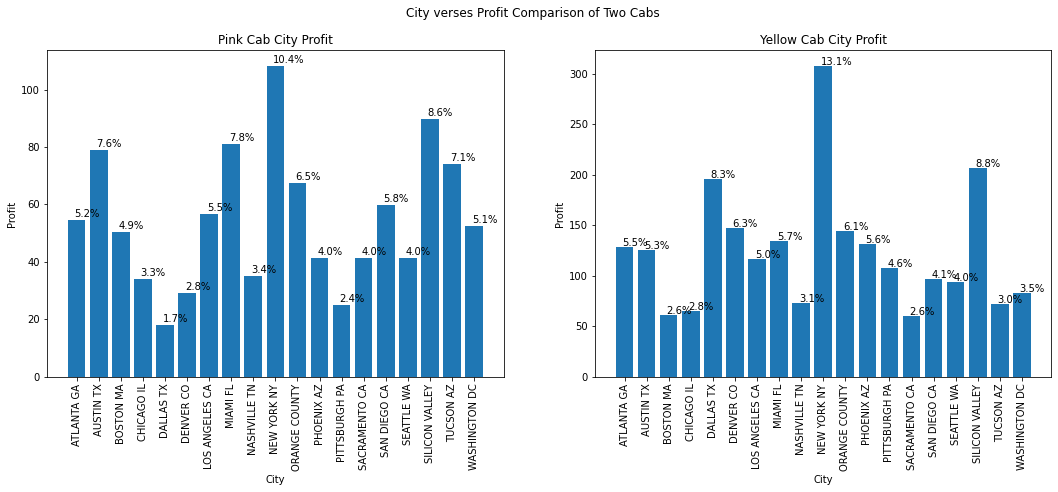

In [68]:
### Determining the Profit by City for each cab company

# create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# plot the first bar chart on the first subplot
ax1.bar(df_pinkcab_cityprofit['City'], df_pinkcab_cityprofit['Profit'])
# rotate the x-axis labels by 90 degrees
ax1.set_xticklabels(df_pinkcab_cityprofit.City, rotation=90)
ax1.set_title('Pink Cab City Profit')
ax1.set_xlabel('City')
ax1.set_ylabel('Profit')
# add text labels with percentages to the bars
for i, v in enumerate(df_pinkcab_cityprofit['Profit']):
    ax1.text(i - 0.1, v + 1, f'{v/df_pinkcab_cityprofit["Profit"].sum()*100:.1f}%', color='black', fontsize=10)


# plot the second bar chart on the second subplot
ax2.bar(df_yellowcab_cityprofit['City'], df_yellowcab_cityprofit['Profit'])
ax2.set_xticklabels(df_yellowcab_cityprofit.City, rotation=90)
ax2.set_title('Yellow Cab City Profit')
ax2.set_xlabel('City')
ax2.set_ylabel('Profit')
# add text labels with percentages to the bars
for i, v in enumerate(df_yellowcab_cityprofit['Profit']):
    ax2.text(i - 0.1, v + 1, f'{v/df_yellowcab_cityprofit["Profit"].sum()*100:.1f}%', color='black', fontsize=10)

    
# set the overall title of the figure
fig.suptitle('City verses Profit Comparison of Two Cabs')

# show the plot
plt.show()

#### <font color=green> Observation: </font>
<font color=green> Profit gained by New York City is the highest than any other City by both the cabs. Yellow cab has 13.1% of Profit from New York City and Pink Cab has 10.4% of Profit from New York City. </font>


### 9. Analysis the monthly transaction vs Price of New York City for Pink and Yellow cabs

In [69]:
# Extracting the data for NEW YORK City
df_pinkcab_NY = df_pinkcab.loc[df_pinkcab['City']=='NEW YORK NY']
df_yellowcab_NY = df_yellowcab.loc[df_yellowcab['City']=='NEW YORK NY']

In [70]:
# Grouped the Pink Cab data by Month
df_pinkcab_NY_month = df_pinkcab_NY.groupby('Month').agg({'TransactionID': 'count', 'Profit': 'sum'})
# Grouped the Yellow Cab data by Month
df_yellowcab_NY_month = df_yellowcab_NY.groupby('Month').agg({'TransactionID': 'count', 'Profit': 'sum'})

<AxesSubplot:title={'center':'TransactionID verses Profit per month - Pink Cab'}, xlabel='TransactionID', ylabel='Profit'>

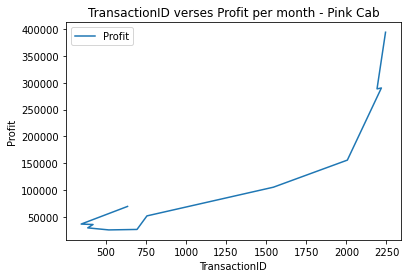

In [71]:
### Determining the monthly transaction verses profit by New york city for Pink cab company
df_pinkcab_NY_month.plot(x='TransactionID', y='Profit', rot=0, title='TransactionID verses Profit per month - Pink Cab'
                    , xlabel= 'TransactionID', ylabel= 'Profit')


<AxesSubplot:title={'center':'TransactionID verses Profit per month - Yellow Cab'}, xlabel='TransactionID', ylabel='Profit'>

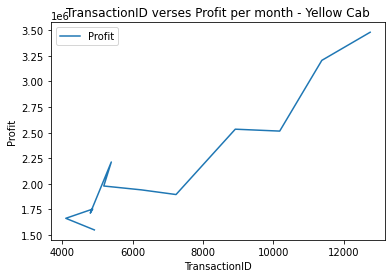

In [72]:
### Determining the monthly transaction verses profit by New york city for Yellow cab company
df_yellowcab_NY_month.plot(x='TransactionID', y='Profit', rot=0, title='TransactionID verses Profit per month - Yellow Cab'
                    , xlabel= 'TransactionID', ylabel= 'Profit')


#### <font color=green> Observation: </font>
<font color=green> For the above 2 graphs, it is depicted that Profit increased with an increase in number of transactions for both the cabs </font>


### 10. Analysis the monthly transaction vs Price for Pink and Yellow cabs

In [73]:
# Grouped the Pink Cab data by Month and PaymentMode
df_pinkcab_mode = df_pinkcab.groupby(['Month','PaymentMode']).agg({'TransactionID': 'count', 'Profit': 'sum'})
# Grouped the Yellow Cab data by Month and PaymentMode
df_yellowcab_mode = df_yellowcab.groupby(['Month','PaymentMode']).agg({'TransactionID': 'count', 'Profit': 'sum'})

<AxesSubplot:title={'center':'TransactionID verses Profit per month - Pink Cab'}, xlabel='TransactionID', ylabel='Profit'>

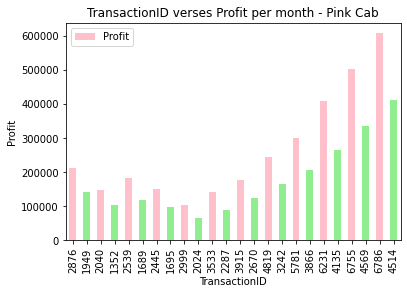

In [74]:
# define colors for each index
colors = ['pink', 'lightgreen']
### Determining the monthly transaction verses profit by Payment Mode for Pink cab company
df_pinkcab_mode.plot.bar(x='TransactionID', y='Profit', rot=90, title='TransactionID verses Profit per month - Pink Cab'
                    , xlabel= 'TransactionID', ylabel= 'Profit', color=colors)


<AxesSubplot:title={'center':'TransactionID verses Profit per month - Yellow Cab'}, xlabel='TransactionID', ylabel='Profit'>

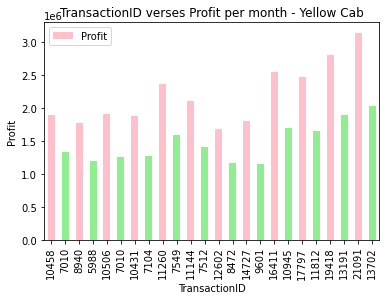

In [75]:
# define colors for each index
colors = ['pink', 'lightgreen']
### Determining the monthly transaction verses profit by Payment Mode for Yellow cab company
df_yellowcab_mode.plot.bar(x='TransactionID', y='Profit', rot=90, title='TransactionID verses Profit per month - Yellow Cab'
                    , xlabel= 'TransactionID', ylabel= 'Profit', color=colors)


#### <font color=green> Observation: </font>
<font color=green> For the above 2 graphs, it is depicted that Card payment mode was higher for both the cabs compared to Cash on all months. </font>


# Hypothesis

### 1. Are the number of users different for both cabs

<font color=green> 1. Null Hypothesis: The number of users are same for both cabs. </font>

<font color=green> 2. Alternate Hypothesis: The number of users are different for both cabs. </font>

In [76]:
p1 = df_master[df_master['Company']=='Pink Cab'].groupby('Users')['Users'].count()
y1 = df_master[df_master['Company']=='Yellow Cab'].groupby('Users')['Users'].count()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(p1,y1)

We accept null hypothesis
P value is  0.06451194993747668


#### <font color=green> Observation: </font>
<font color=green> From the above hypothesis test, its proved that the number of users for both cabs are same. </font>

### 2. Are the number of male and female customers different for both cabs

<font color=green> 1. Null Hypothesis: The number of male and female customers are not different for both cabs. </font>

<font color=green> 2. Alternate Hypothesis: The number of male and female customers are different for both cabs. </font>

In [77]:
p1 = df_pinkcab['Gender'].value_counts()
y1 = df_yellowcab['Gender'].value_counts()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(p1,y1)

We accept alternate hypothesis
P value is  0.04922373545914366


#### <font color=green> Observation: </font>
<font color=green> From the above hypothesis test, its proved that the number of male and female customers for both cabs are different </font>

### 3. Is there any difference in Price Charged between the Male and Female customers for both cabs

<font color=green> 1. Null Hypothesis: There is no difference in Price Charged for Male and Female customers. </font>

<font color=green> 2. Alternate Hypothesis: There is a difference in Price Charged for Male and Female customers.</font>

In [78]:
# Pink Cab
p1 = df_pinkcab[df_pinkcab['Gender']=='Male'].groupby('TransactionID')['PriceCharged'].mean()
p2 = df_pinkcab[df_pinkcab['Gender']=='Female'].groupby('TransactionID')['PriceCharged'].mean()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(p1,p2)

We accept null hypothesis
P value is  0.8019871421072007


In [79]:
# Yellow Cab
y1 = df_yellowcab[df_yellowcab['Gender']=='Male'].groupby('TransactionID')['PriceCharged'].mean()
y2 = df_yellowcab[df_yellowcab['Gender']=='Female'].groupby('TransactionID')['PriceCharged'].mean()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(y1,y2)

We accept alternate hypothesis
P value is  2.0207950578635145e-08


#### <font color=green> Observation: </font>
<font color=green> From the above hypothesis test, its proved that Pink cab charges nearly same Price for male and female customers. Whereas, Yellow cabs charges different price for male and female customers </font>

### 4. Is there any difference in Profit margin between the Male and Female customers for both cabs

<font color=green> 1. Null Hypothesis: There is no difference in Profit for Male and Female customers. </font>

<font color=green> 2. Alternate Hypothesis: There is a difference in Profit for Male and Female customers.</font>

In [80]:
# Pink Cab
p1 = df_pinkcab[df_pinkcab['Gender']=='Male'].groupby('TransactionID')['Profit'].mean()
p2 = df_pinkcab[df_pinkcab['Gender']=='Female'].groupby('TransactionID')['Profit'].mean()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(p1,p2)

We accept null hypothesis
P value is  0.11515305900425798


In [81]:
# Yellow Cab
y1 = df_yellowcab[df_yellowcab['Gender']=='Male'].groupby('TransactionID')['Profit'].mean()
y2 = df_yellowcab[df_yellowcab['Gender']=='Female'].groupby('TransactionID')['Profit'].mean()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(y1,y2)

We accept alternate hypothesis
P value is  6.060473042494144e-25


#### <font color=green> Observation: </font>
<font color=green> From the above hypothesis test, its proved that Pink cab has negligable Profit for male and female customers. Whereas, Yellow cabs different profit for male and female customers </font>

### 5. Is there any difference on Price charged for Age > 60 for both cabs

<font color=green> 1. Null Hypothesis: There is no difference on the Price Charged for the users above 60 years of Age </font>

<font color=green> 2. Alternate Hypothesis: There is a difference on the Price Charged for the users above 60 years of Age. </font>

In [82]:
# Pink Cab
p1 = df_pinkcab[df_pinkcab['Age']>60].groupby('TransactionID')['PriceCharged'].mean()
p2 = df_pinkcab[df_pinkcab['Age']<=60].groupby('TransactionID')['PriceCharged'].mean()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(p1,p2)

We accept null hypothesis
P value is  0.15163688511281687


In [83]:
# Yellow Cab
y1 = df_yellowcab[df_yellowcab['Age']>60].groupby('TransactionID')['PriceCharged'].mean()
y2 = df_yellowcab[df_yellowcab['Age']<=60].groupby('TransactionID')['PriceCharged'].mean()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(y1,y2)

We accept alternate hypothesis
P value is  0.00037639135035337577


#### <font color=green> Observation: </font>
<font color=green> From the above hypothesis test, its proved that Pink cab charges nearly same Price for customers above 60 years of age. Whereas, Yellow cabs charges less for the customers above the age of 60 </font>

### 6. Is there any difference in Profit by each Mode of Payment for both cabs

<font color=green> 1. Null Hypothesis: There is no difference in the Profit gained by Card and Cash Payment Mode. </font>

<font color=green> 2. Alternate Hypothesis: There is a difference in the Profit gained by Card and Cash Payment Mode. </font>

In [84]:
# Pink Cab
p1 = df_pinkcab[df_pinkcab['PaymentMode']=='Card'].groupby('TransactionID')['Profit'].mean()
p2 = df_pinkcab[df_pinkcab['PaymentMode']=='Cash'].groupby('TransactionID')['Profit'].mean()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(p1,p2)

We accept null hypothesis
P value is  0.7900465828793288


In [85]:
# Yellow Cab
y1 = df_yellowcab[df_yellowcab['PaymentMode']=='Card'].groupby('TransactionID')['Profit'].mean()
y2 = df_yellowcab[df_yellowcab['PaymentMode']=='Cash'].groupby('TransactionID')['Profit'].mean()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(y1,y2)

We accept null hypothesis
P value is  0.2933060638298729


#### <font color=green> Observation: </font>
<font color=green> From the above hypothesis test, its proved that there is no difference in the Profit gained by Payment Modes for both Pink cab and Yellow cabs</font>

### 7. Is there any difference in Profit gained from New York City for both cabs

<font color=green> 1. Null Hypothesis: There is no difference in the Profit gained for New York City. </font>

<font color=green> 2. Alternate Hypothesis: There is a difference in the Profit gained for New York City. </font>

In [86]:
# Pink and Yellow Cab
p1 = df_pinkcab[df_pinkcab['City']=='NEW YORK NY'].groupby('TransactionID')['Profit'].mean()
y1 = df_yellowcab[df_yellowcab['City']=='NEW YORK NY'].groupby('TransactionID')['Profit'].mean()
# Calling TestHypothesis to test the hypothesis
TestHypothesis(p1,y1)

We accept alternate hypothesis
P value is  0.0


#### <font color=green> Observation: </font>
<font color=green> From the above hypothesis test, its proved that there is difference in the Profit gained from New York City for both Pink cab and Yellow cabs</font>

### 8. Is there any seasonality for Profit for both cabs

<font color=green> 1. Null Hypothesis: There is no trend and seasonality in the Profit gained for both cabs. </font>

<font color=green> 2. Alternate Hypothesis: There is a trend and seasonality in the Profit gained for both cabs. </font>

In [87]:
# Resetting the index of both datasets
df_pinkcab.reset_index(inplace = True)
df_yellowcab.reset_index(inplace = True)
# Setting DateofTravel variable as index of datasets
df_pinkcab.set_index('DateofTravel', inplace = True)
df_yellowcab.set_index('DateofTravel', inplace = True)

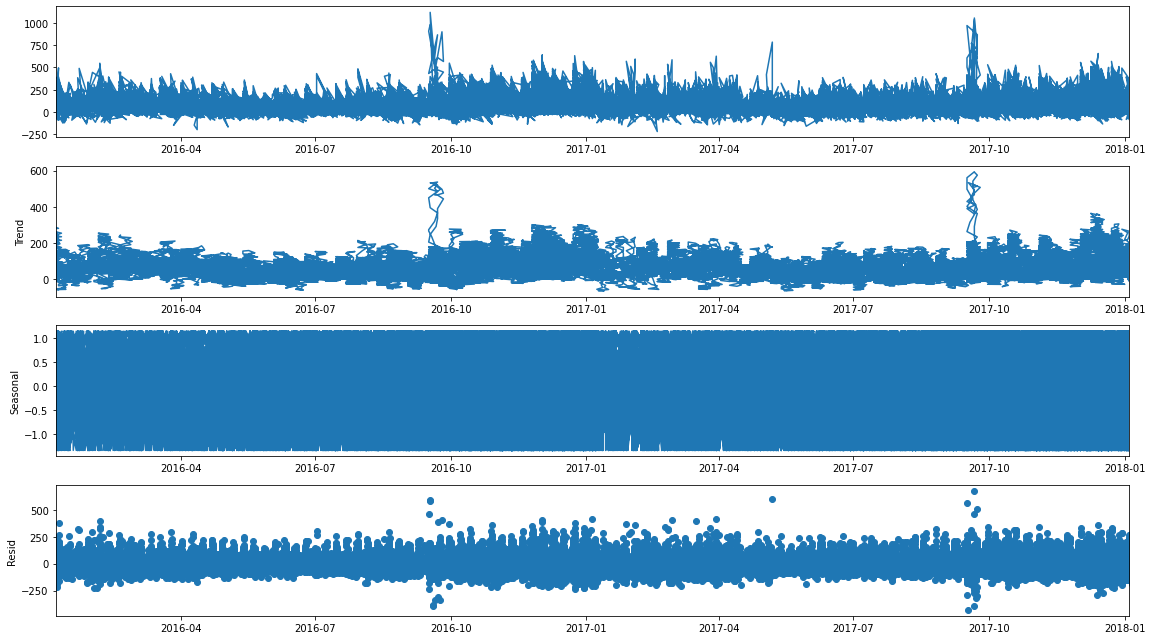

In [88]:
# Calling SDSeasonalTest function to verify if Profit is having any trend or seasonality for Pink Cab
SDSeasonalTest(df_pinkcab[['Profit']])

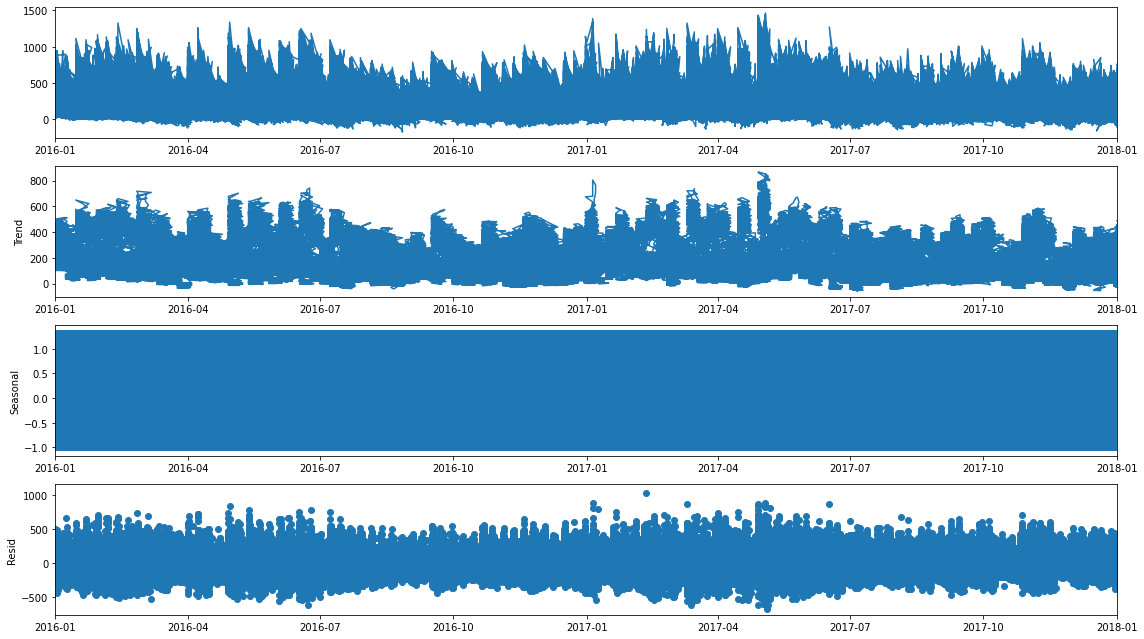

In [89]:
# Calling SDSeasonalTest function to verify if Profit is having any trend or seasonality for Yellow Cab
SDSeasonalTest(df_yellowcab[['Profit']])

In [90]:
# Calling ADFStationarityTest function to verify if Profit is stationarity using dickey-fuller-test for Pink Cab
ADFStationarityTest(df_pinkcab['Profit']) 

Augmented Dickey-Fuller Test Results:
ADF Test Statistics              -21.968746
p-value                            0.000000
#Lag Used                         50.000000
Number of Observations Used    84660.000000
Critical Value (1%)               -3.430427
Critical Value (5%)               -2.861574
Critical Value (10%)              -2.566788
dtype: float64
The time series data has no unit roots and hence it is stationary


In [91]:
# Calling ADFStationarityTest function to verify if Profit is stationarity using dickey-fuller-test for Yellow Cab
ADFStationarityTest(df_yellowcab['Profit'])

Augmented Dickey-Fuller Test Results:
ADF Test Statistics               -20.268509
p-value                             0.000000
#Lag Used                          76.000000
Number of Observations Used    274604.000000
Critical Value (1%)                -3.430374
Critical Value (5%)                -2.861551
Critical Value (10%)               -2.566776
dtype: float64
The time series data has no unit roots and hence it is stationary


#### <font color=green> Observation: </font>
<font color=green> From the above graphs and the p_value, its proved that Profit variable is stationary and does not have any trend or seasonality for both Pink and Yellow cabs</font>

### 9. Is there any seasonality in KM Travelled for both cabs

<font color=green> 1. Null Hypothesis: There is no trend and seasonality in the KMTravelled for both cabs. </font>

<font color=green> 2. Alternate Hypothesis: There is a trend and seasonality in the KMTravelled for both cabs. </font>

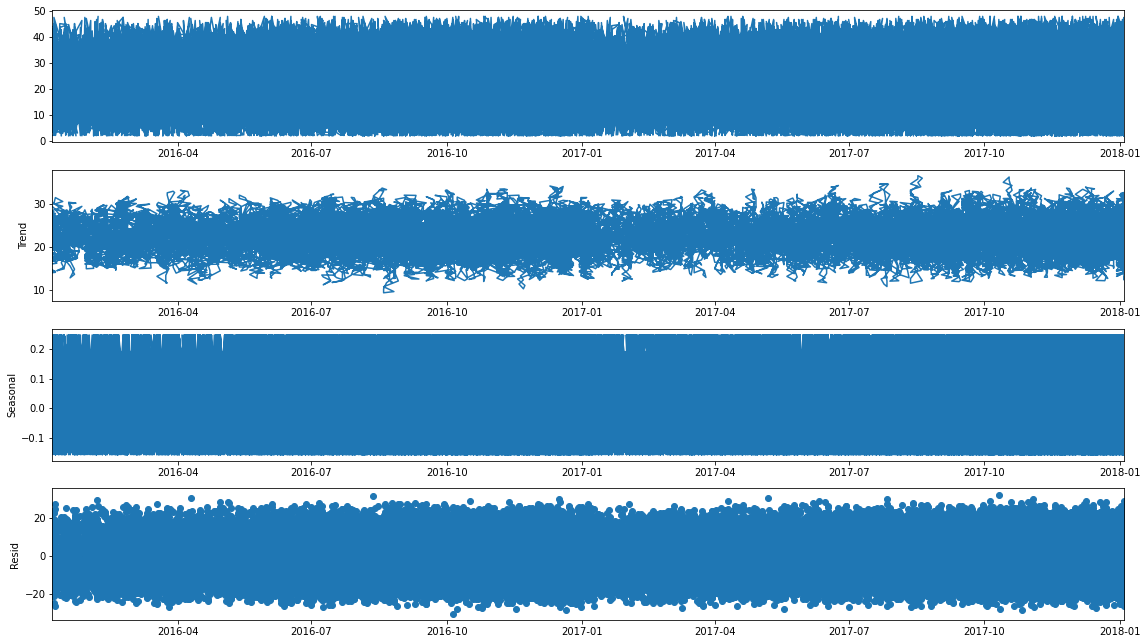

In [92]:
# Calling SDSeasonalTest function to verify if the KMTravelled is having any trend or seasonality for Pink Cab
SDSeasonalTest(df_pinkcab[['KMTravelled']])

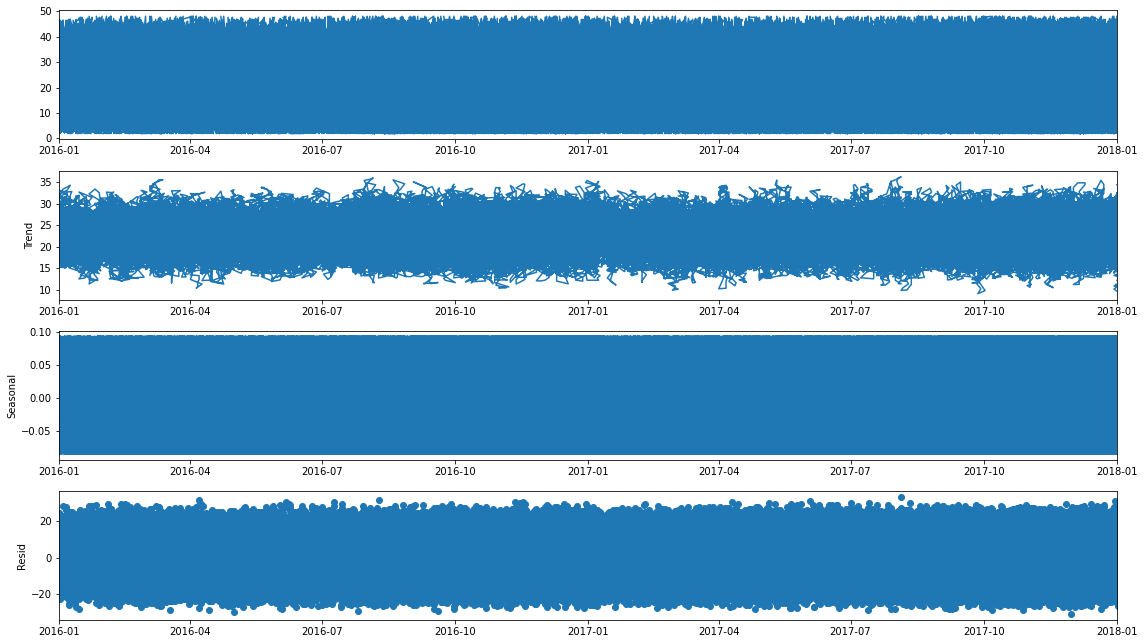

In [93]:
# Calling SDSeasonalTest function to verify if the KMTravelled is having any trend or seasonality for Pink Cab
SDSeasonalTest(df_yellowcab[['KMTravelled']])

In [94]:
# Calling ADFStationarityTest function to verify if KMTravelled is stationarity using dickey-fuller-test for Pink Cab
ADFStationarityTest(df_pinkcab['KMTravelled'])

Augmented Dickey-Fuller Test Results:
ADF Test Statistics             -292.262786
p-value                            0.000000
#Lag Used                          0.000000
Number of Observations Used    84710.000000
Critical Value (1%)               -3.430427
Critical Value (5%)               -2.861574
Critical Value (10%)              -2.566788
dtype: float64
The time series data has no unit roots and hence it is stationary


In [95]:
# Calling ADFStationarityTest function to verify if KMTravelled is stationarity using dickey-fuller-test for Yellow Cab
ADFStationarityTest(df_yellowcab['KMTravelled'])

Augmented Dickey-Fuller Test Results:
ADF Test Statistics              -523.786491
p-value                             0.000000
#Lag Used                           0.000000
Number of Observations Used    274680.000000
Critical Value (1%)                -3.430374
Critical Value (5%)                -2.861551
Critical Value (10%)               -2.566776
dtype: float64
The time series data has no unit roots and hence it is stationary


#### <font color=green> Observation: </font>
<font color=green> From the above graphs and the p_value, its proved that KMTravelled variable is stationary and does not have any trend and seasonality for both Pink and Yellow cabs</font>

# References

###### [1] https://www.hackdeploy.com/augmented-dickey-fuller-test-in-python/#:~:text=The%20adfuller%20function%20returns%20a,a%20dictionary%20of%20Critical%20Values.
###### [2] https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/
###### [3] https://www.kaggle.com/datasets/donnetew/us-holiday-dates-2004-2021
###### [4] https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas